In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.pyplot import imread
from matplotlib.pyplot import figure
import random

# Substitute Case
## Training data Loading

In [3]:
with open('Sub/MultiCoorTraining.pkl', 'rb') as f:
    coor = pickle.load(f)
    
drones = []
for i in range(4):
    with open(f'Sub/ExperimentSim3RTraining/crazyflie{i}.pkl', 'rb') as f:
        crazy = pickle.load(f)
        drones.append(crazy)

## Data preparation

Checking the different entries for any discrepancy

In [5]:
newDrones = []

for j in range(len(drones)):
    crazy = drones[j]
    recent = 0
    new = [crazy[0]]
    for i in range(len(crazy)):
        if i == 0:
            continue

        if crazy[i-1][1] == crazy[i][1]:
            continue

        new.append(crazy[i])
    print(len(crazy))
    print(len(new))
    newDrones.append(new)

1000
1000
1000
1000
1000
1000
832
832


Calculating the run search times by taking the difference from the previous to the next iteration

In [7]:
for i in range(len(coor)):
    if i == 0:
        continue
    
    coor[i-1][1] = coor[i][1]-coor[i-1][1]
coor.pop(-1)

[125, 1746703653.1849062]

Removing all runs with human intervention (>800 seconds)

In [9]:
print(len(coor))

for i in range(len(coor)):
    coor[i][0] = i



1000


In [10]:
pops = []
for i in reversed(range(len(coor))):
    if coor[i][1] > 800:
        pops.append(i)
        for x in range(len(newDrones)-1):
            newDrones[x].pop(i)
            
        for x in reversed(range(len(newDrones[3]))):
            if newDrones[3][x][1] == i:
                newDrones[3].pop(x)
            
        print(coor[i])
        coor.pop(i)
print(len(pops))

[984, 4592.299971818924]
[950, 29111.209989786148]
[945, 4962.389951467514]
[938, 2113.300212621689]
[924, 4869.13040804863]
[922, 9154.91998553276]
[900, 7725.890057325363]
[875, 825.788679599762]
[842, 29473.640072584152]
[728, 1566.709927558899]
[710, 1309.8401672840118]
[681, 5186.980040073395]
[680, 887.4397711753845]
[663, 29156.379999876022]
[620, 950.7035577297211]
[582, 8780.330040693283]
[572, 1781.1397671699524]
[525, 6985.109951019287]
[510, 26133.9801902771]
[469, 3757.090044260025]
[451, 9585.969998836517]
[434, 4191.850065231323]
[400, 932.7300329208374]
[352, 26091.47004532814]
[339, 1020.6799976825714]
[302, 969.6599559783936]
[294, 20111.99973154068]
[273, 3613.6499218940735]
[257, 1147.810257434845]
[232, 27030.489840984344]
[220, 1195.000074148178]
[207, 3747.1103167533875]
[186, 17546.499745607376]
[130, 1131.5802586078644]
[120, 899.651201248169]
[112, 54645.23897027969]
[0, 43599.96640634537]
37


## Plotting

### Training Time
plotting time per iteration

34.140135288238525
775.8000221252441
275.5934206508526


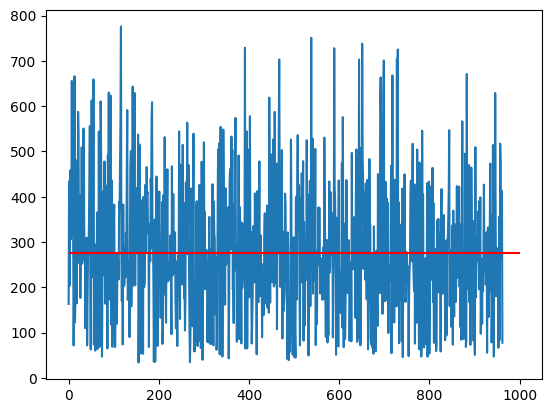

In [12]:
x = [i for i in range(len(coor))]
y = [coor[j][1] for j in range(len(coor))]
print(min(y))
print(max(y))
avg = sum(y)/len(y)
print(avg)
plt.plot(x,y)
plt.hlines(avg, 0 ,1000, color='red')
plt.savefig('subTrainingTime.png')

### Training search types
collecting all search types for graphing

In [14]:
names = []
allWins = []
allFails = []
allCalls = []

for i in range(len(newDrones)):
    crazy = newDrones[i]
    print(crazy[0][0][1:])
    names.append(crazy[0][0][1:])
    fails = 0
    wins = 0
    callbacks = 0
    for j in crazy:
        case = j[4]
        if case == 0:
            fails+= 1
        elif case == 1:
            wins += 1
        else:
            callbacks+= 1
    allWins.append(wins)
    allFails.append(fails)
    allCalls.append(callbacks)
    print(f'Wins {wins}') 
    print(f'Fails {fails}') 
    print(f'Callbacks {callbacks}') 
    print()
    
di = {
    'Successful Searches': allWins,
    'Unfinished run' : allFails,
    'Callbacks' : allCalls
}
print(sum(allWins), sum(allFails), sum(allCalls))

crazyflie0
Wins 163
Fails 549
Callbacks 251

crazyflie1
Wins 159
Fails 562
Callbacks 242

crazyflie2
Wins 161
Fails 566
Callbacks 236

crazyflie3
Wins 142
Fails 476
Callbacks 183

625 2153 912


625


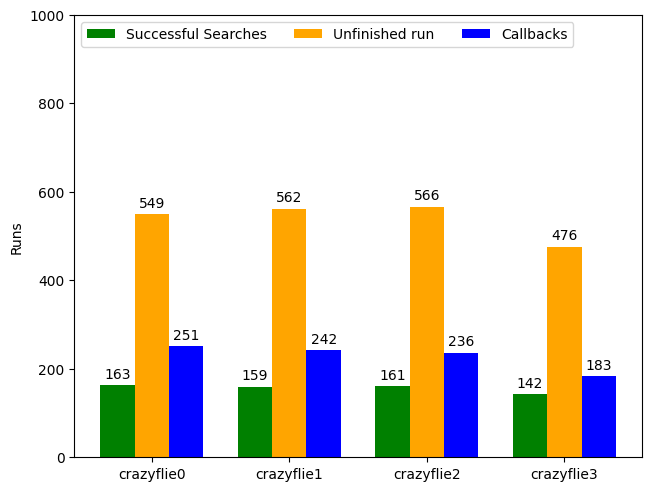

In [15]:
x = np.arange(len(names))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0
color = ['green', 'orange', 'blue']

fig, ax = plt.subplots(layout='constrained')

for name, count in di.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, count, width, label=name, color=color[multiplier])
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Runs')
ax.set_xticks(x + width, names)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1000)


plt.savefig('subTraining.png')
print(sum(allWins))

### Training strategies

Select 4 random iteration, add the starting point and sort by iteration for cleaner graph

In [17]:
boxes = [(21.0, -5.0),(15.0, 6.0),(5.0,0.3),(-2.0,7.2),(-2.2, -2.6),(-5.6,-5.9),(20.2, -0.2),(11.59,0.67)]
testCases = []    
indexs =[432,522,545,838]
for r in range(4):
    #index = random.randint(0, len(coor))
    ite = indexs[r]
    drones = []
    for i in range(len(newDrones)-1):
        for j in range(len(newDrones[i])):
            if ite == newDrones[i][j][1]:
                crazy = newDrones[i][j][:]
                box = [boxes[x] for x in crazy[2]]
                box.insert(0, (0.0,0.0))
                crazy.append(box[:])
                drones.append(crazy)

    for i in range(len(newDrones[3])):
        if newDrones[3][i][1] == crazy[1]:
            c = newDrones[3][i]
            box = [boxes[x] for x in c[2]]
            c.append(box)
            drones.append(c)
    
    testCases.append(drones)

testCases.sort(key=lambda x: x[0][1])


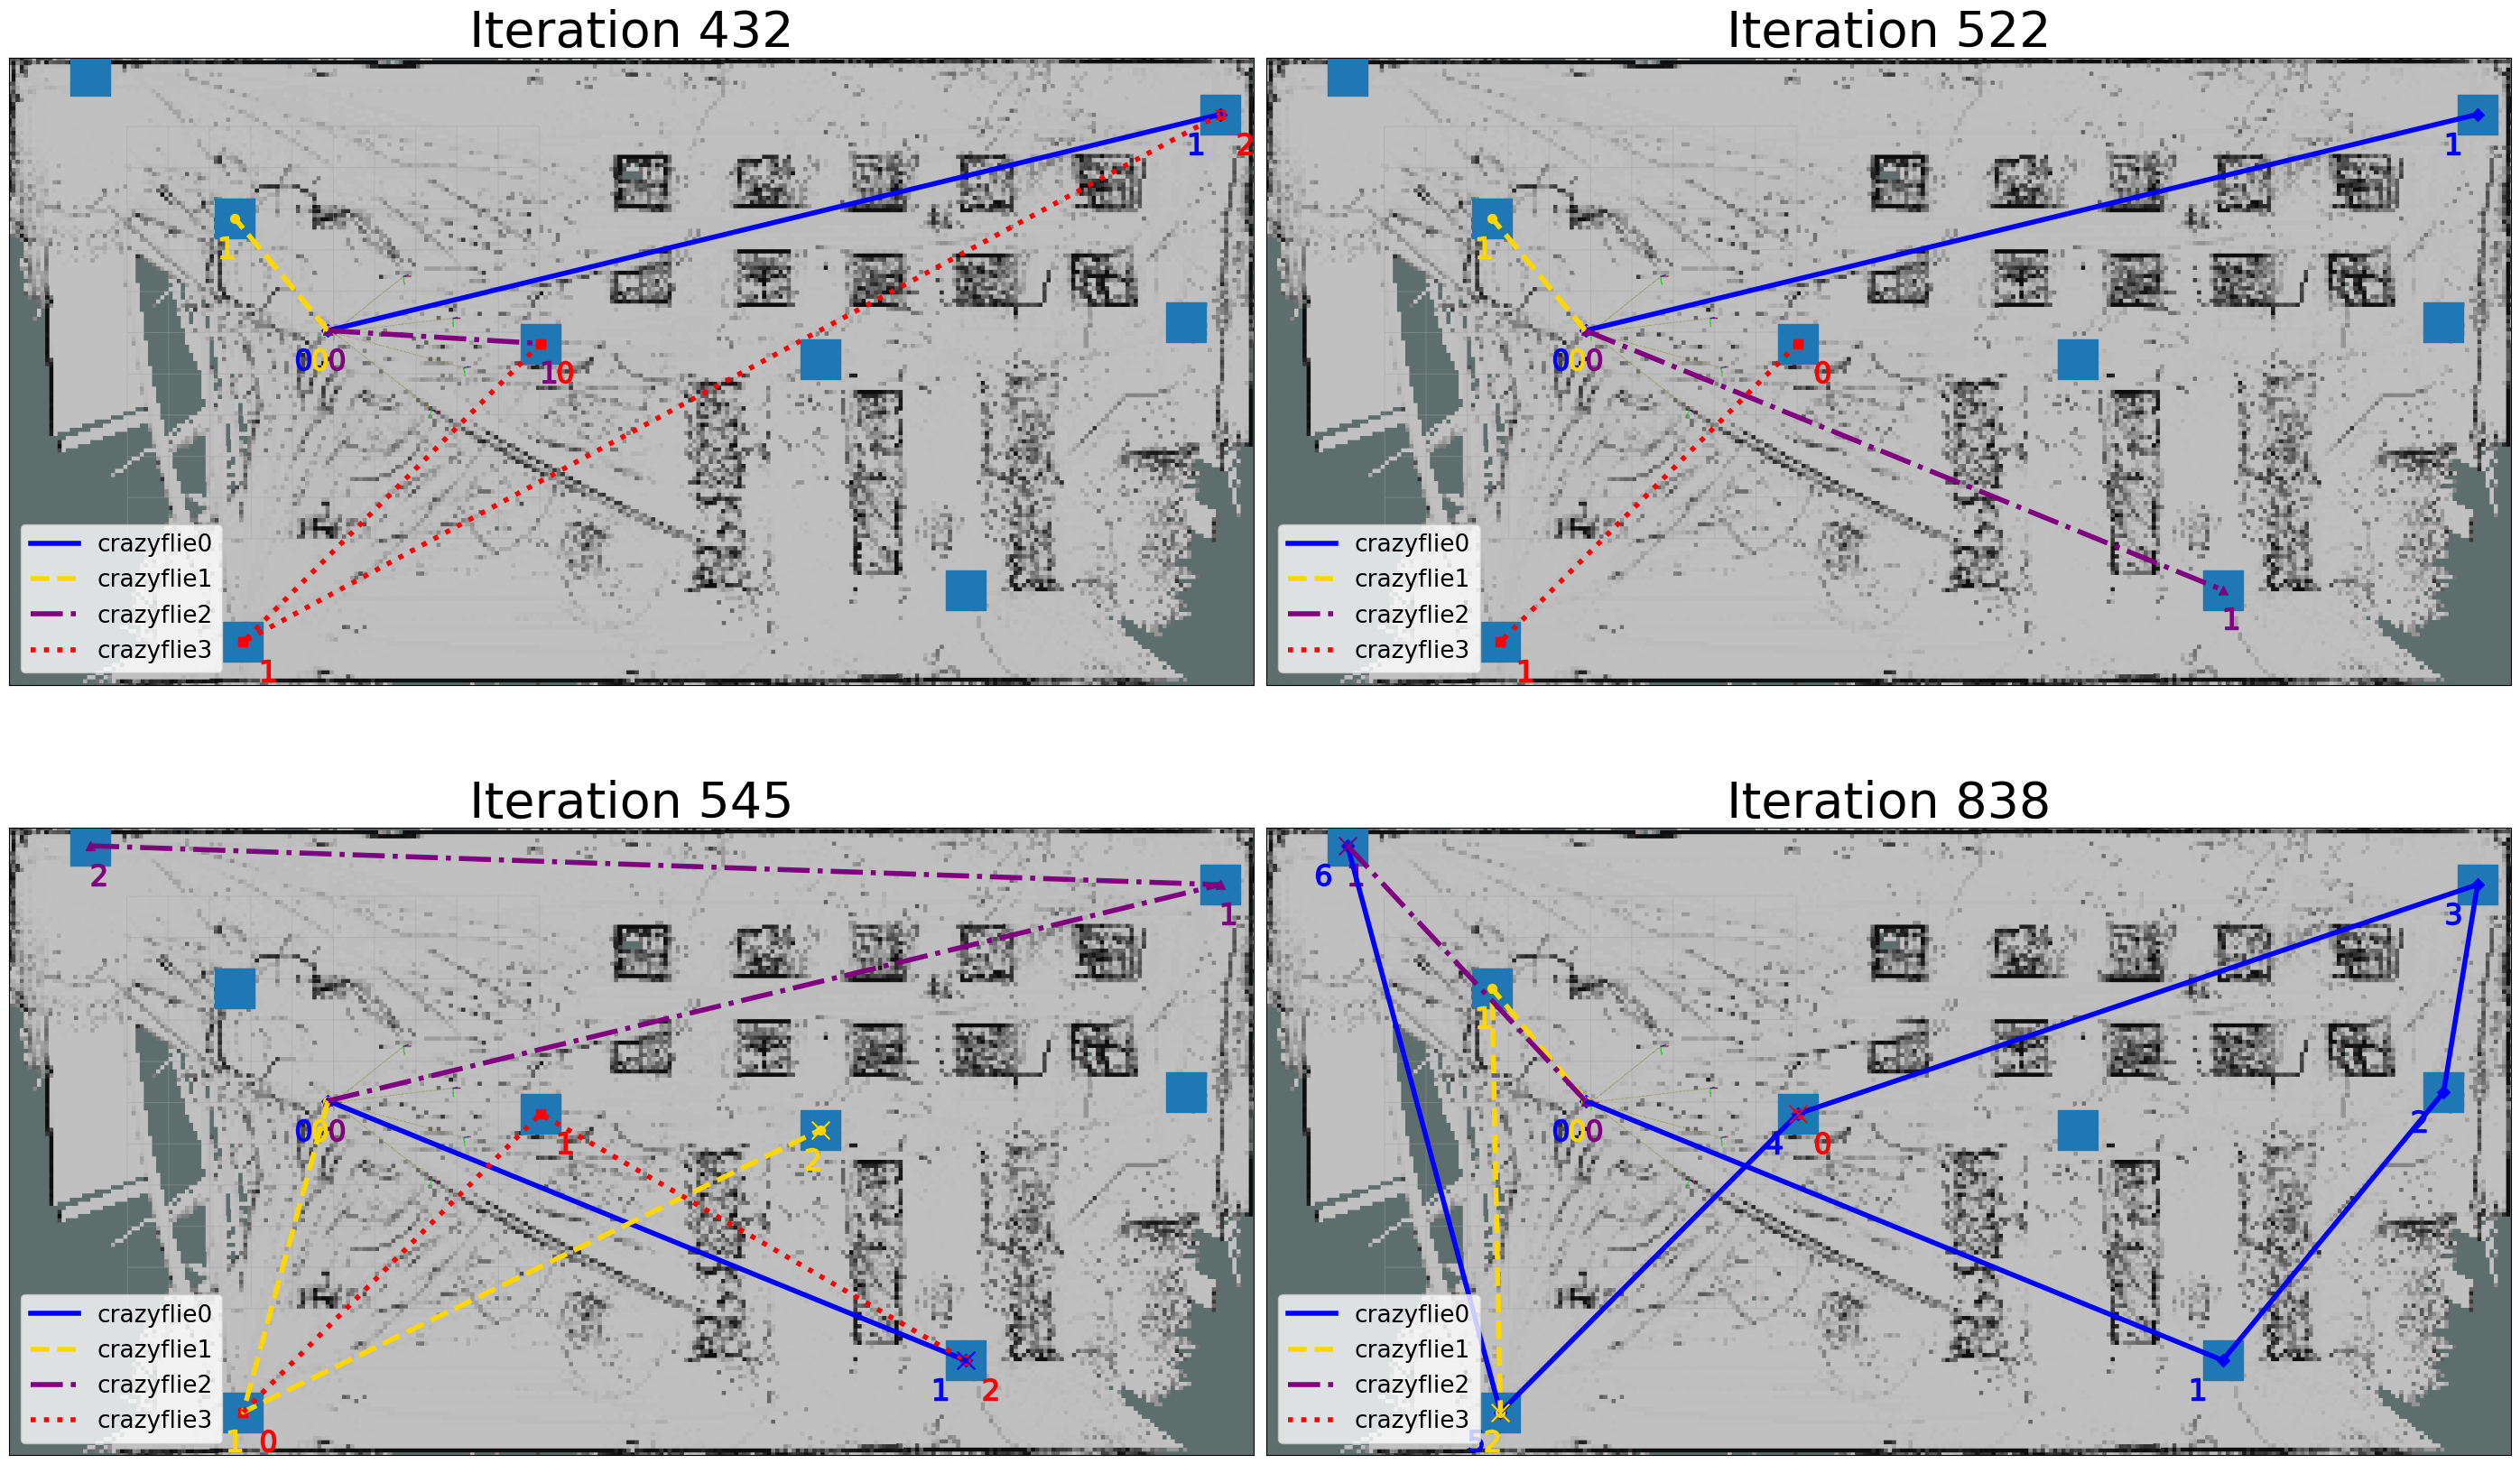

In [18]:
figure(figsize=(28, 18))    
for tes in range(len(testCases)):
    types = ['-','--','-.',':']
    n = ['Cr0','Cr1','Cr2','Cr3']
    color = ["blue",'gold','purple','red']
    shapes = ['D','o','^','s']
    counter = 0
    mult = -1.5
    
    img = imread("FieldM.png")

    plt.subplot(2, 2, tes+1)
    plt.imshow(img,zorder=0)

    xb = [(boxes[x][0]+7.5)*51.706 for x in range(len(boxes))]
    yb = [(boxes[x][1]+6.3)*52.62 for x in range(len(boxes))]
    plt.scatter(xb,yb, marker = 's',s=1000)
    
    for i in testCases[tes]:
        x = [(i[-1][x][0]+7.5)*51.706 for x in range(len(i[-1]))]
        y = [(i[-1][x][1]+6.3)*52.62 for x in range(len(i[-1]))]
        case = i[4]
        plt.plot(x,y, ls = types[counter],label=names[counter],linewidth = '4', color = color[counter])
        for i in range(len(x)):
            plt.scatter(x[i],y[i], marker = shapes[counter],s=50, c=color[counter])
            plt.scatter(x[i]+20*mult,y[i]+35, marker = f"${i}$",s=300, c=color[counter])
        if case == 0:
            plt.scatter(x[i],y[i], marker = 'x',s=200, c=color[counter], zorder=20)
        counter+= 1
        mult+=1

    plt.legend(loc =3, prop={'size': 19})
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])
    plt.title(f'Iteration {testCases[tes][0][1]}',fontsize = 40)
plt.tight_layout(pad=1.0)
plt.savefig('subTrainingStrat.png')
plt.show()

## Test data loading

In [20]:
with open('Sub/MultiCoor.pkl', 'rb') as f:
    coor = pickle.load(f)
    
drones = []
for i in range(4):
    with open(f'Sub/ExperimentSim3R/crazyflie{i}.pkl', 'rb') as f:
        crazy = pickle.load(f)
        drones.append(crazy)

## Data preparation

Checking the different entries for any discrepancy

In [22]:
newDrones = []

for j in range(len(drones)):
    crazy = drones[j]
    recent = 0
    new = [crazy[0]]
    for i in range(len(crazy)):
        if i == 0:
            continue

        if crazy[i-1][1] == crazy[i][1]:
            continue

        new.append(crazy[i])
    print(len(crazy))
    print(len(new))
    newDrones.append(new)

200
200
200
200
200
200
168
168


Calculating the run search times by taking the difference from the previous to the next iteration

In [24]:
for i in range(len(coor)):
    if i == 0:
        continue
    
    coor[i-1][1] = coor[i][1]-coor[i-1][1]
coor.pop(-1)

[200, 1746787302.5941052]

Removing all runs with human intervention (>800 seconds)

In [26]:
print(len(coor))

for i in range(len(coor)):
    coor[i][0] = i


200


In [27]:
pops = []
for i in reversed(range(len(coor))):
    if coor[i][1] > 800:
        pops.append(i)
        for x in range(len(newDrones)-1):
            newDrones[x].pop(i)
            
        for x in reversed(range(len(newDrones[3]))):
            if newDrones[3][x][1] == i:
                newDrones[3].pop(x)
            
        print(coor[i])
        coor.pop(i)
print(len(pops))

[167, 17341.34001302719]
[116, 3291.1899502277374]
[109, 6534.9497265815735]
[86, 941.6800196170807]
[62, 2132.730162382126]
[19, 3078.5594613552094]
6


## Plotting

### Test Search Time
plotting time per iteration

45.34001660346985
717.860029220581
250.58683137918257


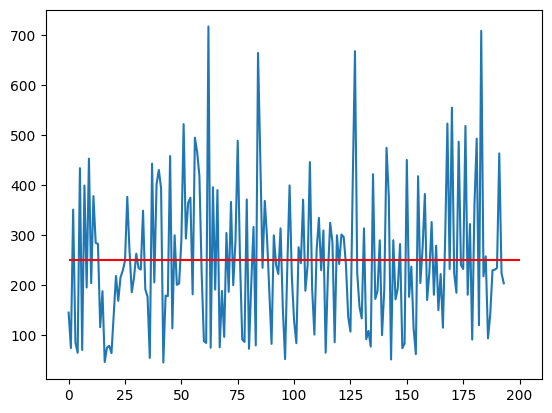

In [29]:
x = [i for i in range(len(coor))]
y = [coor[j][1] for j in range(len(coor))]
print(min(y))
print(max(y))
avg = sum(y)/len(y)
print(avg)
plt.plot(x,y)
plt.hlines(avg, 0 ,200, color='red')
plt.savefig('subTime.png')

### Test search types
collecting all search types for graphing

In [31]:
names = []
allWins = []
allFails = []
allCalls = []

for i in range(len(newDrones)):
    crazy = newDrones[i]
    print(crazy[0][0][1:])
    names.append(crazy[0][0][1:])
    fails = 0
    wins = 0
    callbacks = 0
    for j in crazy:
        case = j[4]
        if case == 0:
            fails+= 1
        elif case == 1:
            wins += 1
        else:
            callbacks+= 1
    allWins.append(wins)
    allFails.append(fails)
    allCalls.append(callbacks)
    print(f'Wins {wins}') 
    print(f'Fails {fails}') 
    print(f'Callbacks {callbacks}') 
    print()
    
di = {
    'Successful Searches': allWins,
    'Unfinished run' : allFails,
    'Callbacks' : allCalls
}

print(sum(allWins), sum(allFails), sum(allCalls))

crazyflie0
Wins 34
Fails 105
Callbacks 55

crazyflie1
Wins 43
Fails 100
Callbacks 51

crazyflie2
Wins 25
Fails 121
Callbacks 48

crazyflie3
Wins 40
Fails 85
Callbacks 39

142 411 193


142


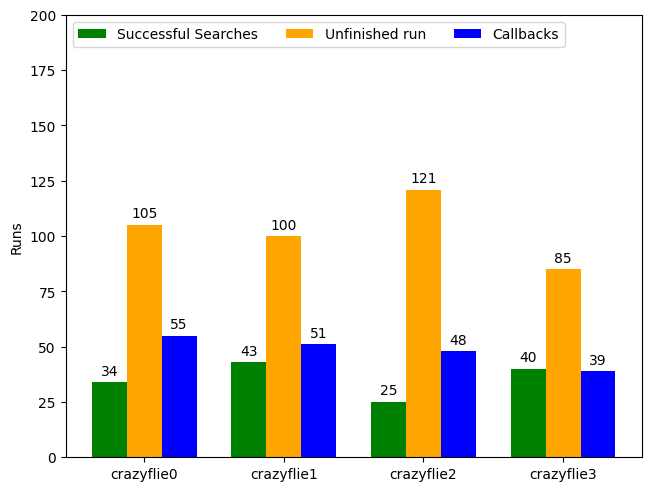

In [32]:
x = np.arange(len(names))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0
color = ['green', 'orange', 'blue']

fig, ax = plt.subplots(layout='constrained')

for name, count in di.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, count, width, label=name, color=color[multiplier])
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Runs')

ax.set_xticks(x + width, names)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 200)


plt.savefig('sub.png')
print(sum(allWins))

### Test strategies

Select 4 random iteration, add the starting point and sort by iteration for cleaner graph

In [34]:
boxes = [(21.0, -5.0),(15.0, 6.0),(5.0,0.3),(-2.0,7.2),(-2.2, -2.6),(-5.6,-5.9),(20.2, -0.2),(11.59,0.67)]
testCases = []    
indexs =[75,130,151,197]
for r in range(4):
    #index = random.randint(0, len(coor))
    ite = indexs[r]
    drones = []
    for i in range(len(newDrones)-1):
        for j in range(len(newDrones[i])):
            if ite == newDrones[i][j][1]:
                crazy = newDrones[i][j][:]
                box = [boxes[x] for x in crazy[2]]
                box.insert(0, (0.0,0.0))
                crazy.append(box[:])
                drones.append(crazy)

    for i in range(len(newDrones[3])):
        if newDrones[3][i][1] == crazy[1]:
            c = newDrones[3][i]
            box = [boxes[x] for x in c[2]]
            c.append(box)
            drones.append(c)
    
    testCases.append(drones)

testCases.sort(key=lambda x: x[0][1])

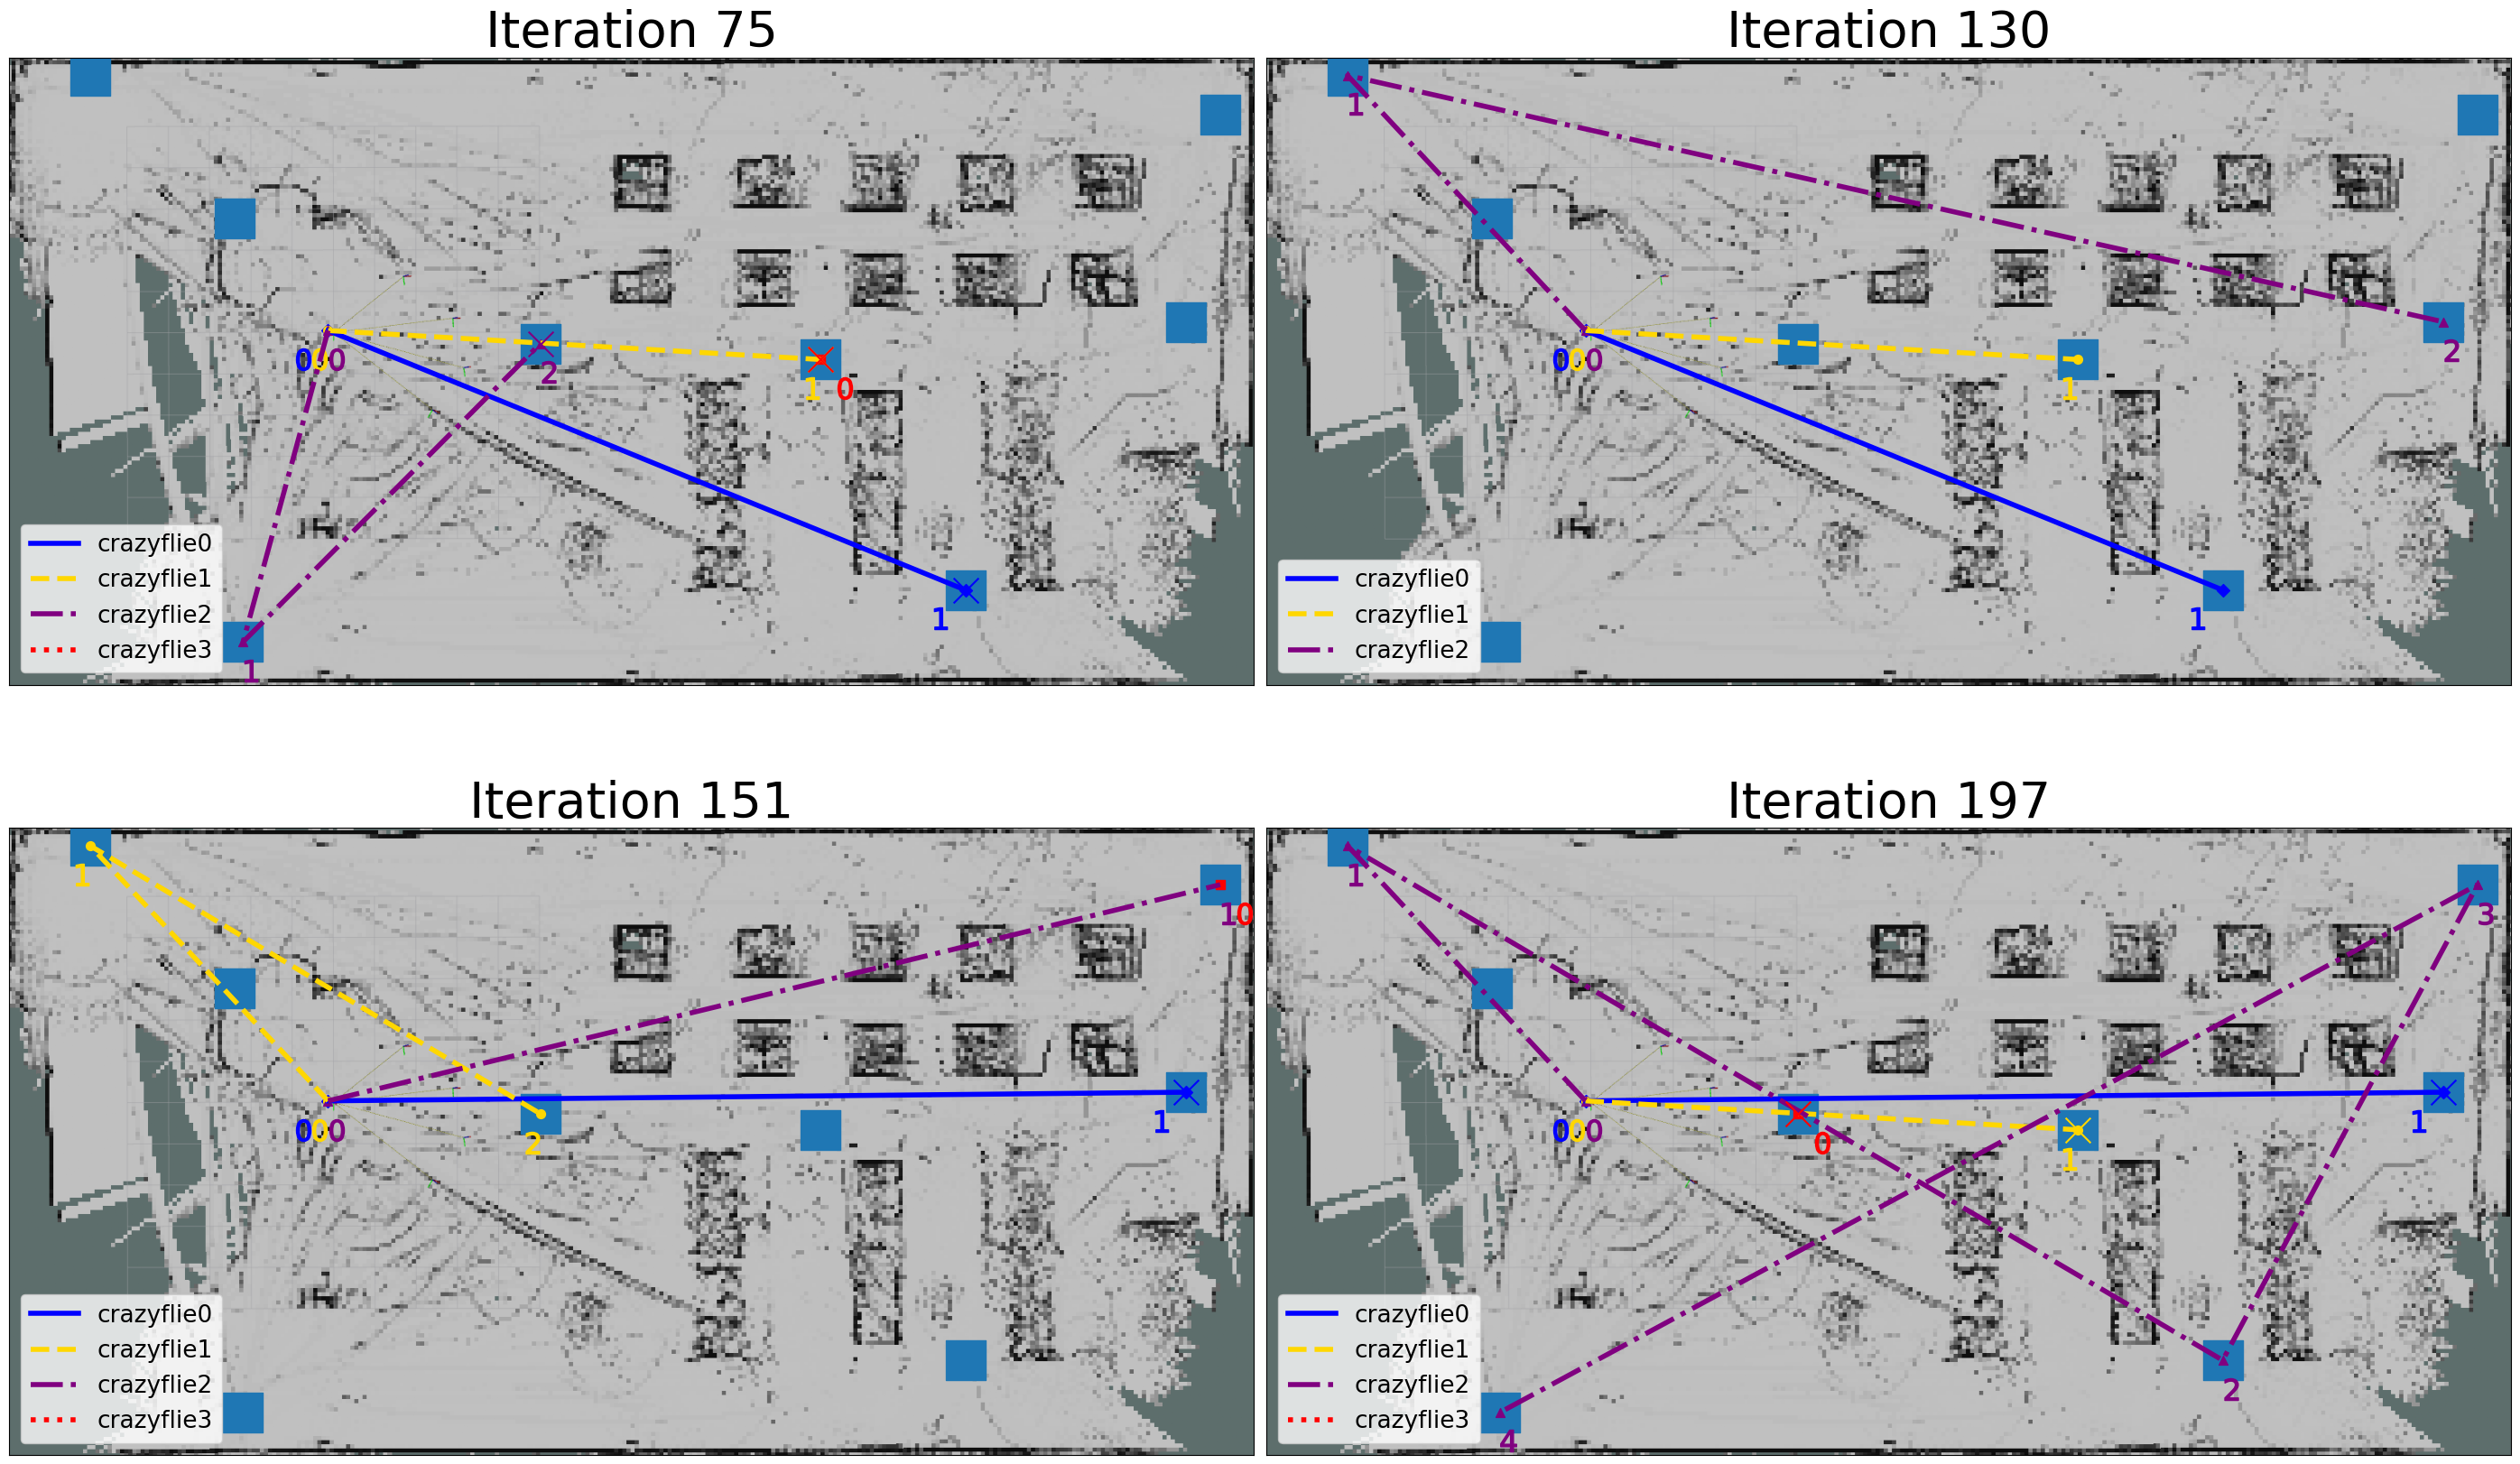

In [35]:
figure(figsize=(28, 18))    
for tes in range(len(testCases)):
    types = ['-','--','-.',':']
    n = ['Cr0','Cr1','Cr2','Cr3']
    color = ["blue",'gold','purple','red']
    shapes = ['D','o','^','s']
    counter = 0
    mult = -1.5
    
    img = imread("FieldM.png")

    plt.subplot(2, 2, tes+1)
    plt.imshow(img,zorder=0)

    xb = [(boxes[x][0]+7.5)*51.706 for x in range(len(boxes))]
    yb = [(boxes[x][1]+6.3)*52.62 for x in range(len(boxes))]
    plt.scatter(xb,yb, marker = 's',s=1000)

    for i in testCases[tes]:
        x = [(i[-1][x][0]+7.5)*51.706 for x in range(len(i[-1]))]
        y = [(i[-1][x][1]+6.3)*52.62 for x in range(len(i[-1]))]
        case = i[4]
        
        plt.plot(x,y, ls = types[counter],label=names[counter],linewidth = '4', color = color[counter])
        for i in range(len(x)):
            plt.scatter(x[i],y[i], marker = shapes[counter],s=50, c=color[counter])
            plt.scatter(x[i]+20*mult,y[i]+35, marker = f"${i}$",s=300, c=color[counter])
        if case == 0:
            plt.scatter(x[i],y[i], marker = 'x',s=400, c=color[counter], zorder=20)
        counter+= 1
        mult+=1

    plt.legend(loc =3, prop={'size': 19})
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])
    plt.title(f'Iteration {testCases[tes][0][1]}',fontsize = 40)
plt.tight_layout(pad=1.0)
plt.savefig('subStrat.png')
plt.show()